<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Андрей!</b>
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

# Определение стоимости автомобилей

## Описание проекта

### Описание целей и задачи

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля.
Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

### Описание данных

Данные находятся в файле /datasets/autos.csv. Скачать датасет.
Признаки
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

Целевой признак
* Price — цена (евро)

### План работы

1. Загрузите данные, путь к файлу: /datasets/autos.csv.
2. Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
3. Подготовьте выборки для обучения моделей.
4. Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
5. Проанализируйте время обучения, время предсказания и качество моделей.
6. Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.
Примечания:

* Для оценки качества моделей применяйте метрику RMSE.
* Значение метрики RMSE должно быть меньше 2500.
* Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
* Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
* Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
* Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del.
del features_train 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть вступительный комментарий.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Также можно добавить содержание для более легкой навигации по проекту.

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score

from catboost import CatBoostRegressor

from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в одном месте в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Стоит учитывать рекомендации PEP-8 при оформлении проекта, в том числе импортов. С ними можно познакомиться по ссылке: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html

In [2]:
try:
    df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\autos.csv')
    df_epoch = pd.read_csv('C:\\Users\\ASUS\\Downloads\\autos.csv')#для анализа эпохи регистрации машин
except FileNotFoundError:
    df = pd.read_csv('/datasets/autos.csv')
    df_epoch = pd.read_csv('/datasets/autos.csv')
df.head(50)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что используешь конструкцию try/except для загрузки данных.

In [3]:
#переименование колонок
df.rename(columns={'DateCrawled':'date_crawled','Price':'price','VehicleType':'vehicle_type',
                  'RegistrationYear':'registration_year','Gearbox':'gearbox','Power':'power',
                  'Model':'model','Kilometer':'kilometer','RegistrationMonth':'registration_month',
                  'FuelType':'fuel_type','Brand':'brand','Repaired':'repaired','DateCreated':'date_created',
                  'NumberOfPictures':'number_of_pictures','PostalCode':'postal_code','LastSeen':'last_seen'},inplace = True)
df_epoch.rename(columns={'DateCrawled':'date_crawled','Price':'price','VehicleType':'vehicle_type',
                  'RegistrationYear':'registration_year','Gearbox':'gearbox','Power':'power',
                  'Model':'model','Kilometer':'kilometer','RegistrationMonth':'registration_month',
                  'FuelType':'fuel_type','Brand':'brand','Repaired':'repaired','DateCreated':'date_created',
                  'NumberOfPictures':'number_of_pictures','PostalCode':'postal_code','LastSeen':'last_seen'},inplace = True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что работаешь со стилем.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  repaired            283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

In [5]:
#совпадение даты скачивания с датой создания
sum([1 if df['date_crawled'][i][:10] == df['date_created'][i][:10] else 0 for i in range(len(df['date_crawled']))])

342585

In [6]:
#совпадение даты скачивания с датой создания
sum([1 if df['date_crawled'][i][:4] == '2016' else 0 for i in range(len(df['date_crawled']))])

354369

In [7]:
df.duplicated().sum()

4

In [8]:
#удаление дубликатов
df_epoch=df_epoch.drop_duplicates().reset_index(drop=True)
df=df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

'LastSeen'

Колонки 'DateCrawled', 'DateCreated' и 'LastSeen' не будут входить в признаки при обучении моделей, т.к. В этих признаках указан один год, от которого нет никакой зависимости. Влияние года есть в колонке 'RegistrationYear'.
Также не будет входить 'PostalCode'.

In [9]:
df['vehicle_type'].value_counts()

sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: vehicle_type, dtype: int64

In [10]:
df['gearbox'].value_counts()

manual    268249
auto       66283
Name: gearbox, dtype: int64

In [11]:
df['number_of_pictures'].value_counts()

0    354365
Name: number_of_pictures, dtype: int64

Скорее всего произошла утечка данных. Количество фотографиий - неинформативный признак

In [12]:
df['model'].value_counts()

golf                  29232
other                 24420
3er                   19761
polo                  13066
corsa                 12570
                      ...  
serie_2                   8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 250, dtype: int64

In [13]:
df['fuel_type'].value_counts()

petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

In [14]:
df['repaired'].value_counts()

no     247158
yes     36053
Name: repaired, dtype: int64

### Изучение пропусков

Можно поставить вместо NaN слово "Нет", чтобы с объектом могла работать машина, потому что удалять объекты с пропущенными значениями не имеет смысла(по простой оценке можно сказать, что их может быть в районе 80 тыс., что много). NaN говорит нам, что определенной информации в рецепте нет.
Логика также в том, что, если в объекте есть пропуски, то цена машины будет ниже, чем если бы были.

In [15]:
#изменение пропущенных значений
df = df.fillna('Нет')
df_epoch = df_epoch.fillna('Нет')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Допускается такой подход.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354365 entries, 0 to 354364
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354365 non-null  object
 1   price               354365 non-null  int64 
 2   vehicle_type        354365 non-null  object
 3   registration_year   354365 non-null  int64 
 4   gearbox             354365 non-null  object
 5   power               354365 non-null  int64 
 6   model               354365 non-null  object
 7   kilometer           354365 non-null  int64 
 8   registration_month  354365 non-null  int64 
 9   fuel_type           354365 non-null  object
 10  brand               354365 non-null  object
 11  repaired            354365 non-null  object
 12  date_created        354365 non-null  object
 13  number_of_pictures  354365 non-null  int64 
 14  postal_code         354365 non-null  int64 
 15  last_seen           354365 non-null  object
dtypes:

### Графический анализ

<AxesSubplot:>

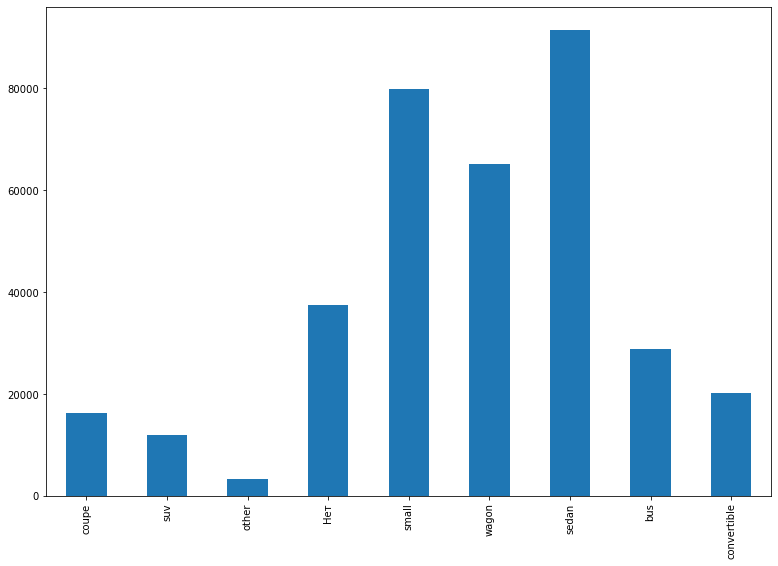

In [17]:
#Построение графика количества машин по типу автомобильного кузова
df['vehicle_type'].value_counts(sort=False).plot.bar(figsize=(13,9))

Наиболее распространенный автомобильный кузов - 'sedan'

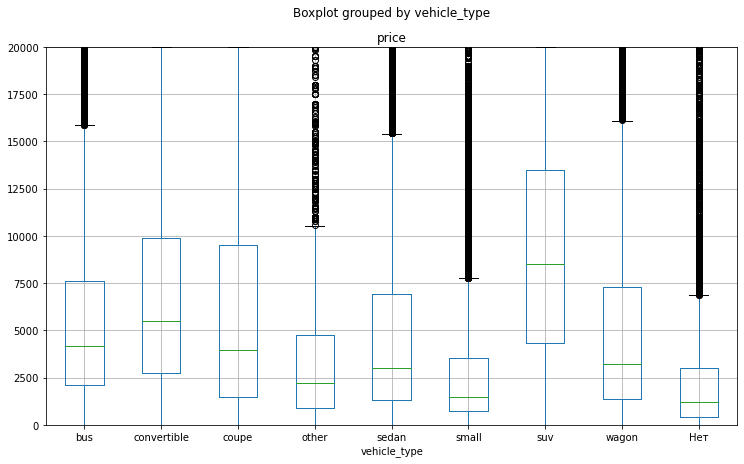

In [18]:
df.boxplot('price', by='vehicle_type', figsize=(12,7))
plt.ylim(0,20000);

<AxesSubplot:>

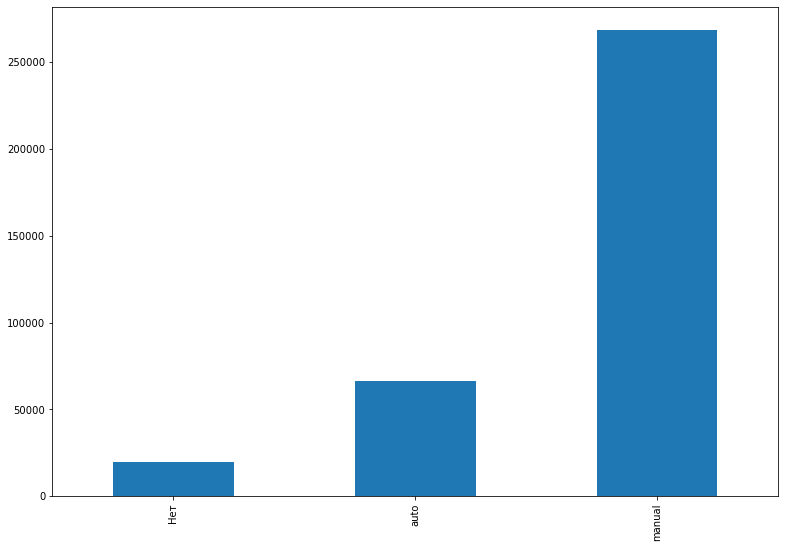

In [19]:
#Построение графика количества машин по типу передач
df['gearbox'].value_counts(sort=False).plot.bar(figsize=(13,9))

Наиболее распространенный тип передач - 'manual'

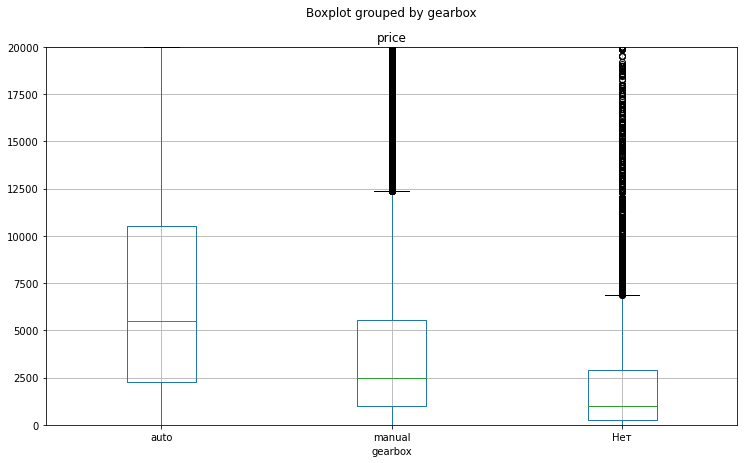

In [20]:
df.boxplot('price', by='gearbox', figsize=(12,7))
plt.ylim(0,20000);

<AxesSubplot:>

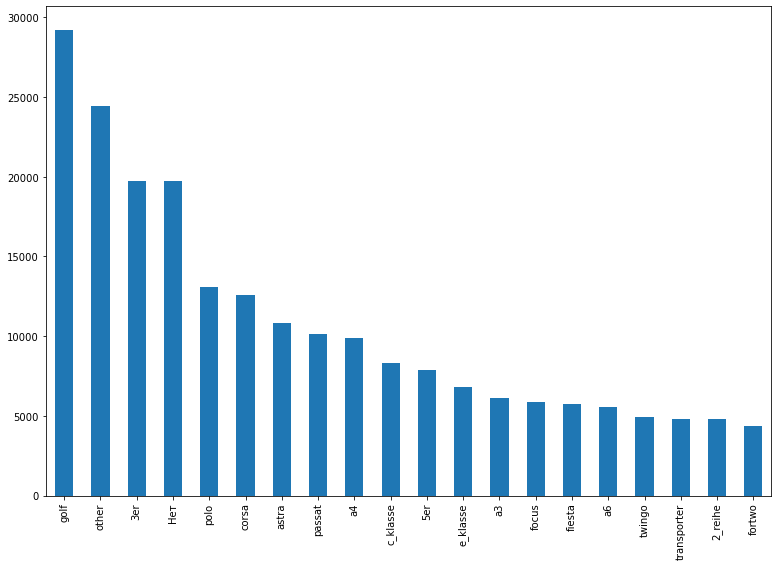

In [21]:
#Построение графика количества машин по 20ти распространненым моделям
df['model'].value_counts(ascending=False)[:20].plot.bar(figsize=(13,9))

Наиболее распространенная модель машины - 'golf'

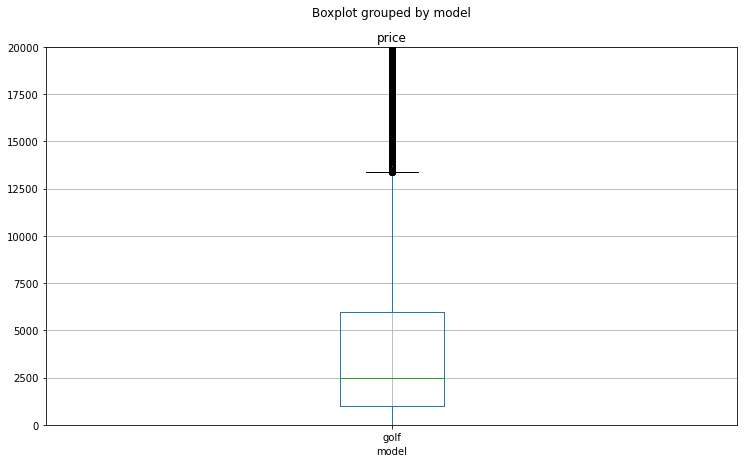

In [22]:
df[df['model'] == df['model'].value_counts(ascending=False)[:20].index[0]].boxplot('price', by='model', figsize=(12,7))
plt.ylim(0,20000);

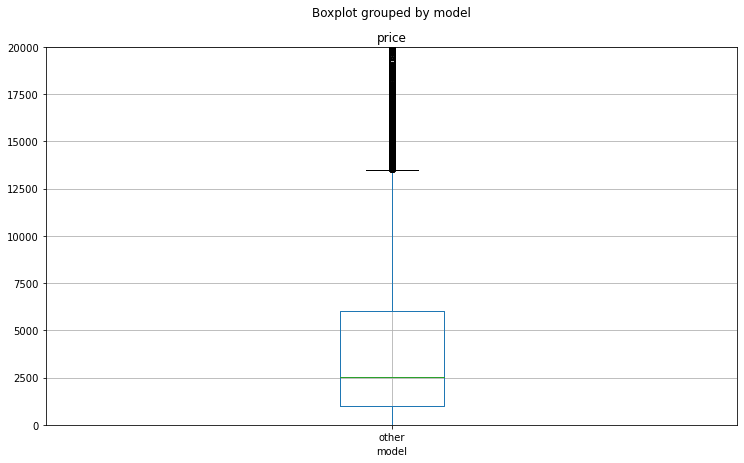

In [23]:
df[df['model'] == df['model'].value_counts(ascending=False)[:20].index[1]].boxplot('price', by='model', figsize=(12,7))
plt.ylim(0,20000);

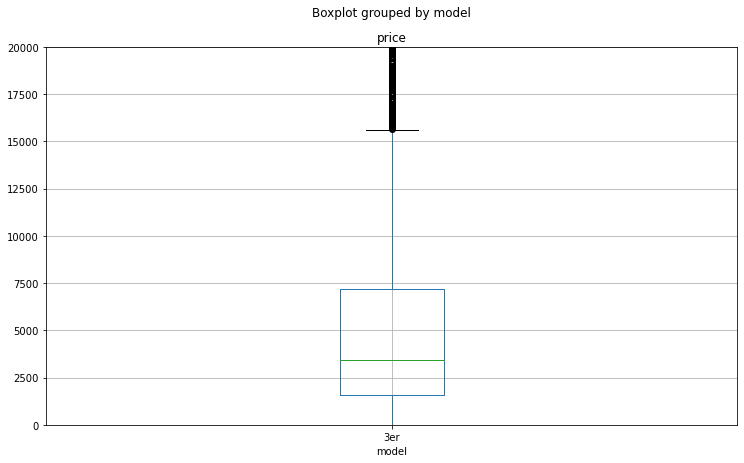

In [24]:
df[df['model'] == df['model'].value_counts(ascending=False)[:20].index[2]].boxplot('price', by='model', figsize=(12,7))
plt.ylim(0,20000);

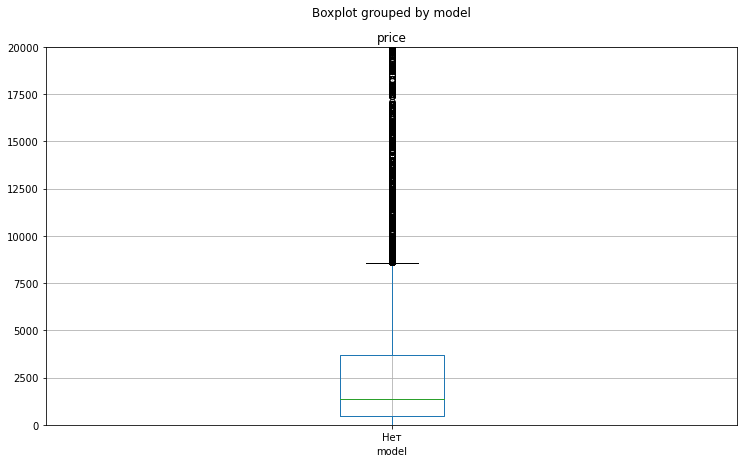

In [25]:
df[df['model'] == df['model'].value_counts(ascending=False)[:20].index[3]].boxplot('price', by='model', figsize=(12,7))
plt.ylim(0,20000);

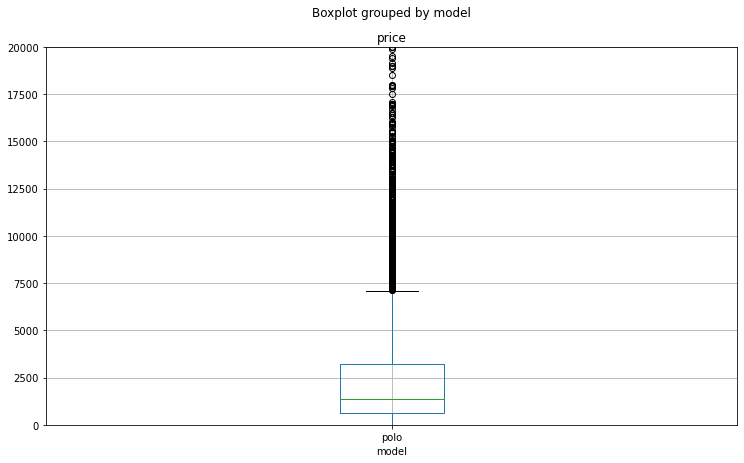

In [26]:
df[df['model'] == df['model'].value_counts(ascending=False)[:20].index[4]].boxplot('price', by='model', figsize=(12,7))
plt.ylim(0,20000);

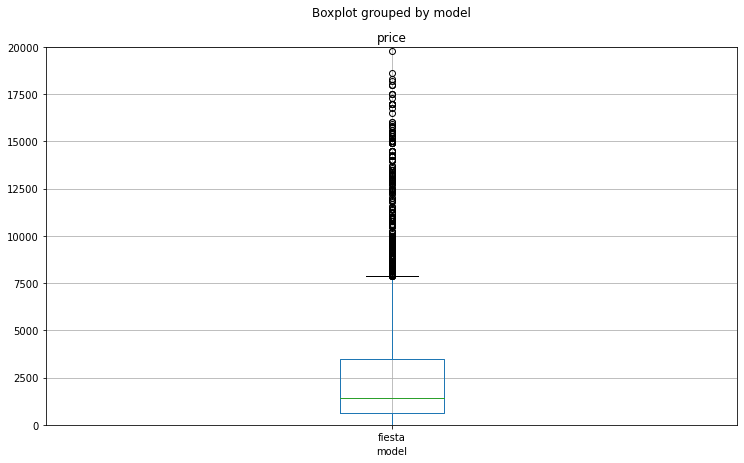

In [27]:
df[df['model'] == df['model'].value_counts(ascending=False)[:20].index[14]].boxplot('price', by='model', figsize=(12,7))
plt.ylim(0,20000);

<AxesSubplot:>

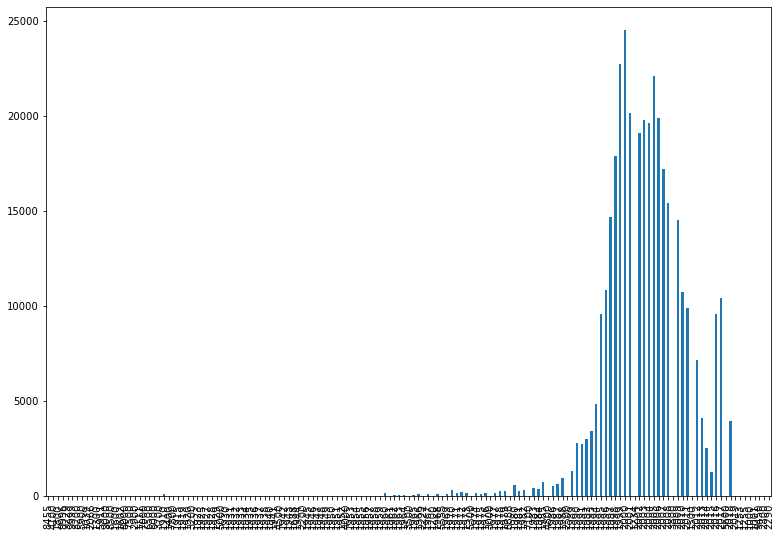

In [28]:
#Построение графика количества машин по годам
df['registration_year'].value_counts(sort=False).plot.bar(figsize=(13,9))

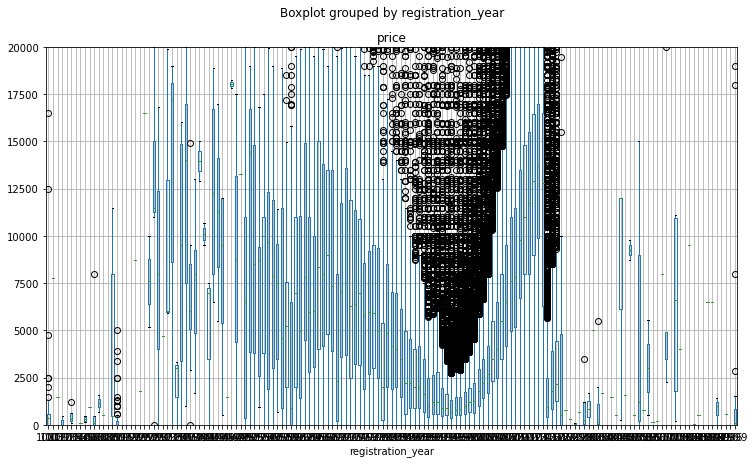

In [29]:
df.boxplot('price', by='registration_year', figsize=(12,7))
plt.ylim(0,20000);

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Вот здесь непонятно, что написано на x ticks, можно их развернуть.

In [30]:
df['registration_year'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1111, 1969, 1971, 1987, 1986,
       1988, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968,
       1977, 1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967,
       1959, 9999, 1956, 3200, 1000, 1941, 8888, 1500, 2200, 4100, 1962,
       1929, 1957, 1940, 3000, 2066, 1949, 2019, 1937, 1951, 1800, 1953,
       1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911, 1933, 1400, 1950,
       4000, 1948, 1952, 1200, 8500, 1932, 1255, 3700, 3800, 4800, 1942,
       7000, 1935, 1936, 6500, 1923, 2290, 2500, 1930, 1001, 9450, 1944,
       1943, 1934, 1938, 1688, 2800, 1253, 1928, 1919, 5555, 5600, 1600,
       2222, 1039, 9996, 1300, 8455, 1931, 1915, 4500, 1920, 1602, 7800,
       9229, 1947, 1927, 7100, 8200, 1946, 7500, 35

In [31]:
year=[]
for i in range(len(df['date_crawled'])):
    if df['date_crawled'][i][:4] not in year:
        year.append(df['date_crawled'][i][:4])
year

['2016']

Значения большие 2016 года можно заменить на медианное(2016 год, т.к. в выгрузке анкет находятся только машины, загруженные в 2016 году, не более и менее), чтобы программа могла обработать объект, под эту категорию подойдут значение меньшие 1768 года, т.к. в этот год была создана первая машина.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Стоит пересмотреть верхнюю границу года регистрации, так как в датасете есть столбец, содержащий дату выгрузки анкеты. Есди год регистрации автомобиля превышает эту дату, стоит усомниться в корректности данных.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Понял
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

In [32]:
df.loc[:,'registration_year'][df['registration_year'] > 2016] = df['registration_year'].median()
df.loc[:,'registration_year'][df['registration_year'] < 1768] = df['registration_year'].median()
df_epoch.loc[:,'registration_year'][df_epoch['registration_year'] > 2016] = 0
df_epoch.loc[:,'registration_year'][df_epoch['registration_year'] < 1768] = 0

<ipython-input-32-28c6aaa9b7a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'registration_year'][df['registration_year'] > 2016] = df['registration_year'].median()
<ipython-input-32-28c6aaa9b7a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'registration_year'][df['registration_year'] < 1768] = df['registration_year'].median()
<ipython-input-32-28c6aaa9b7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

<AxesSubplot:>

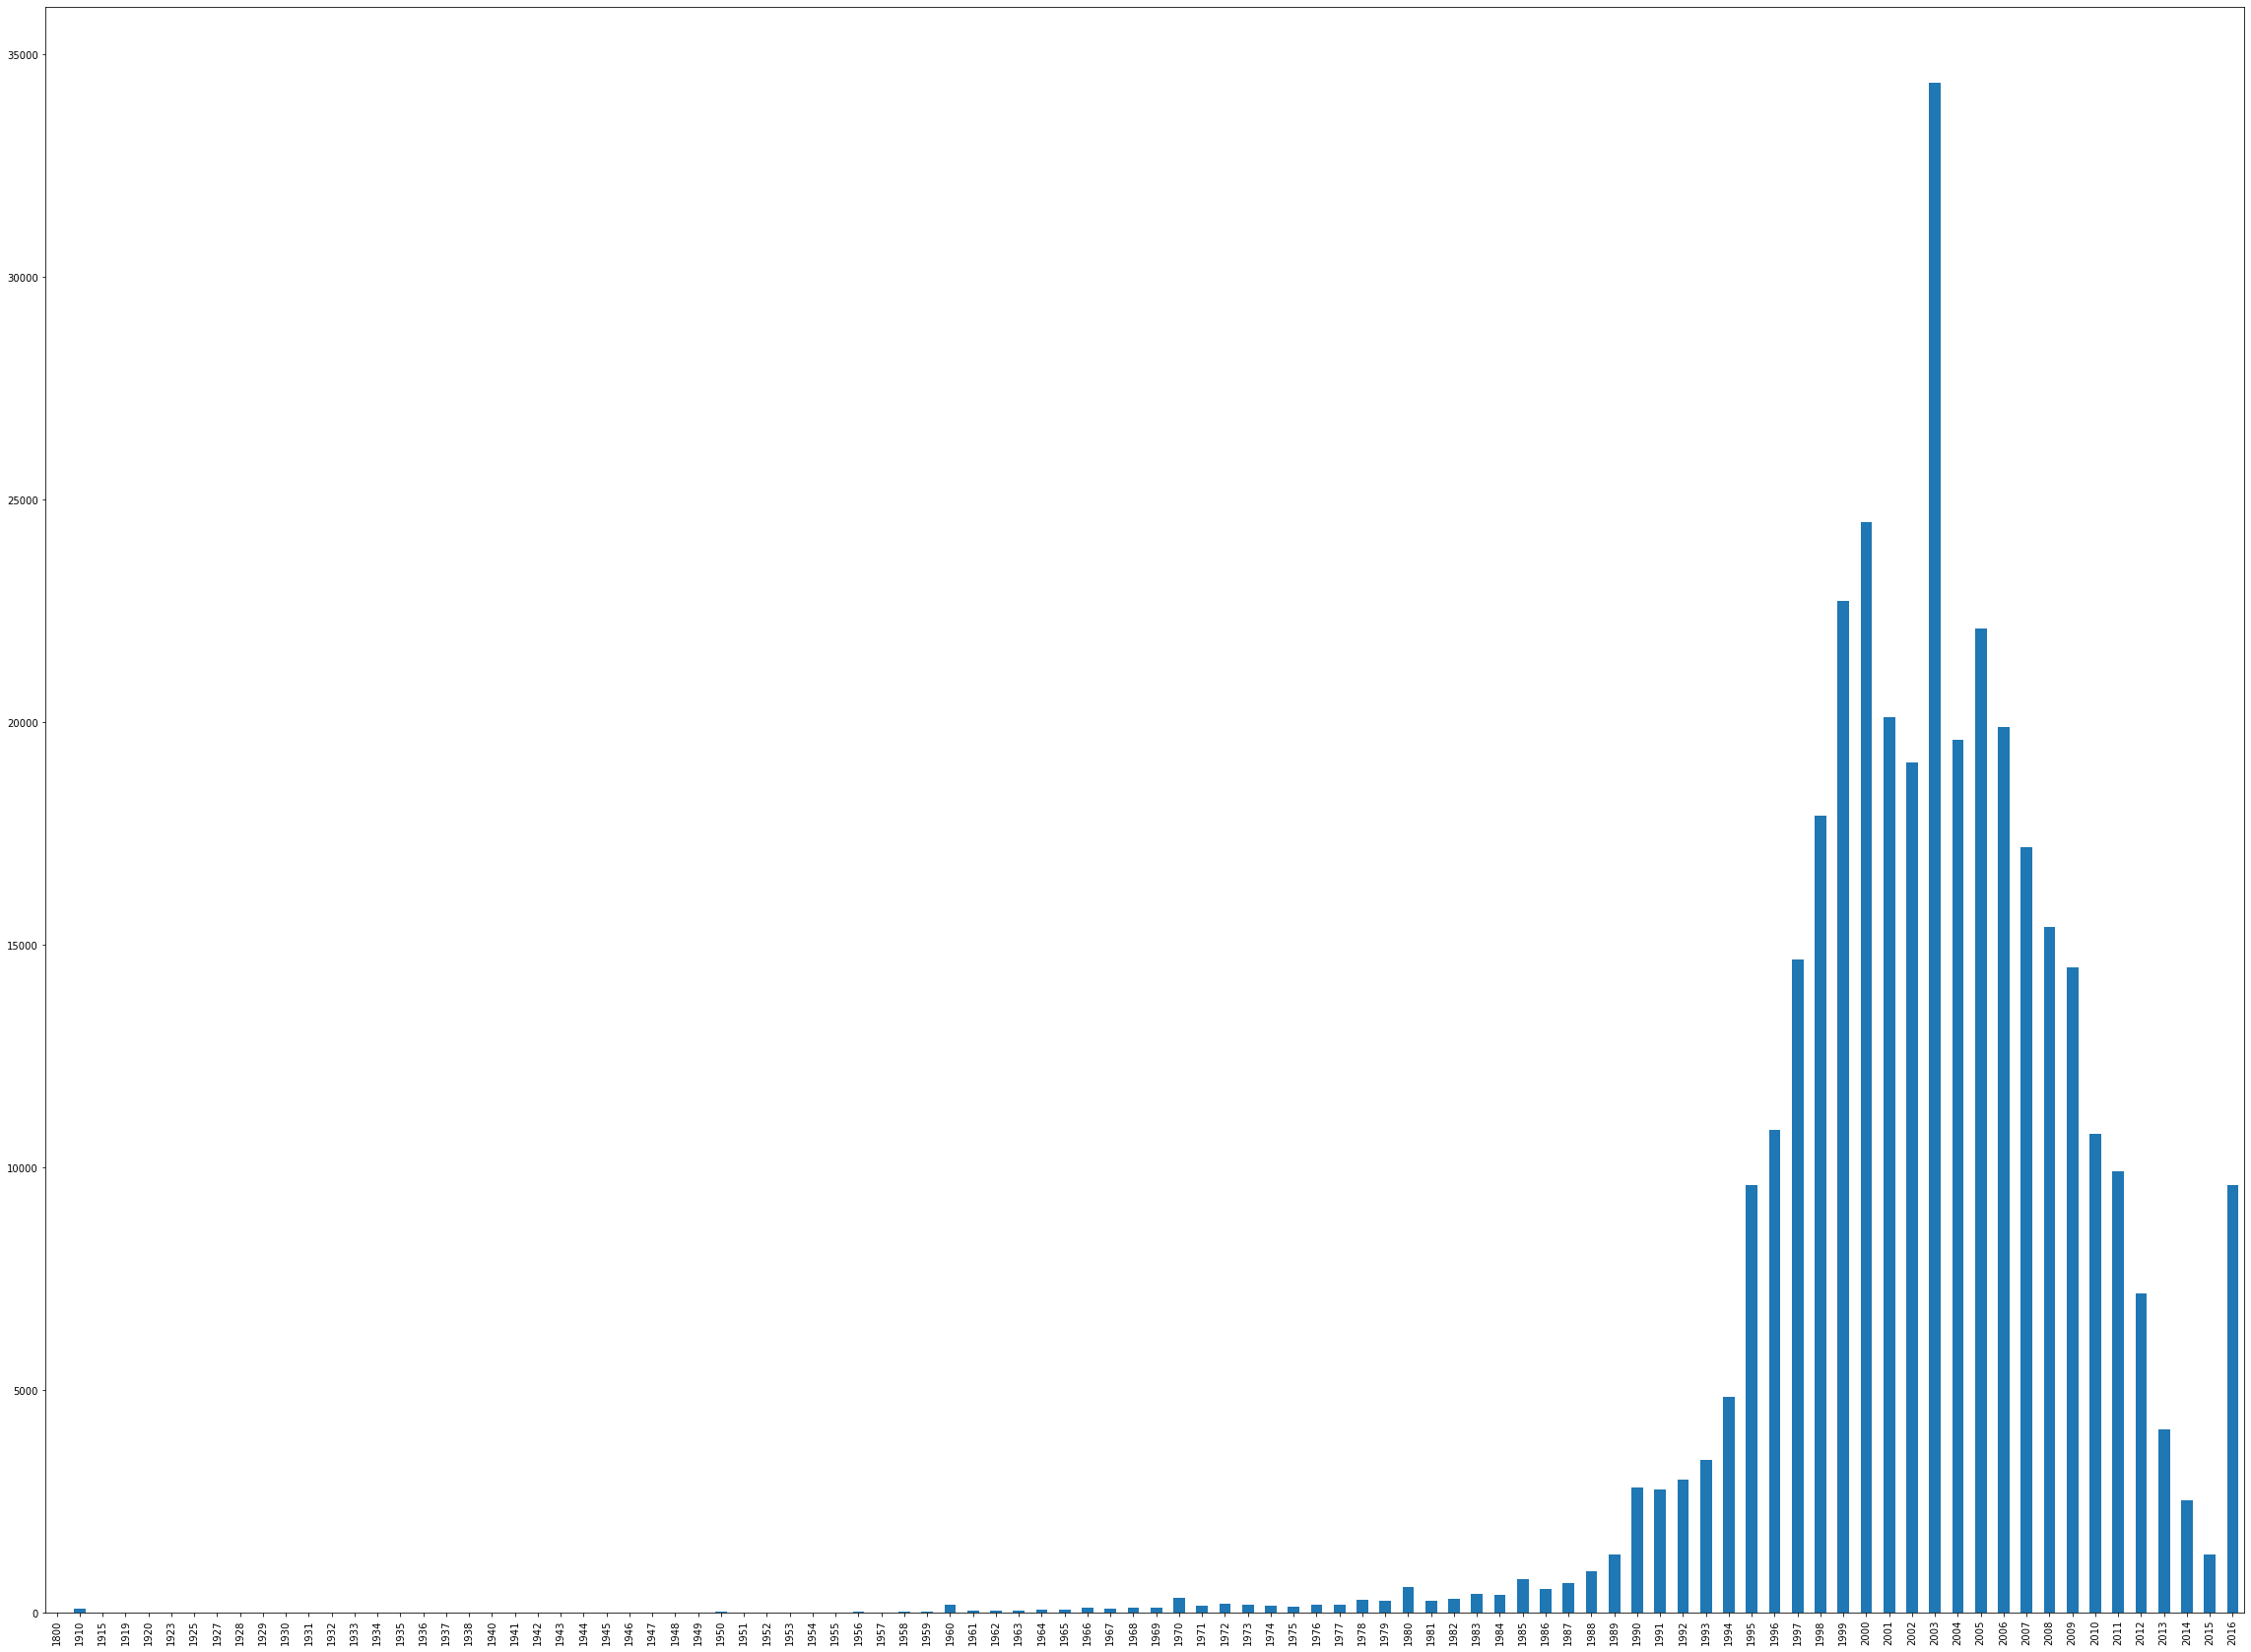

In [33]:
#Построение графика количества машин по годам
df['registration_year'].value_counts(sort=False).plot.bar(figsize=(40,30))

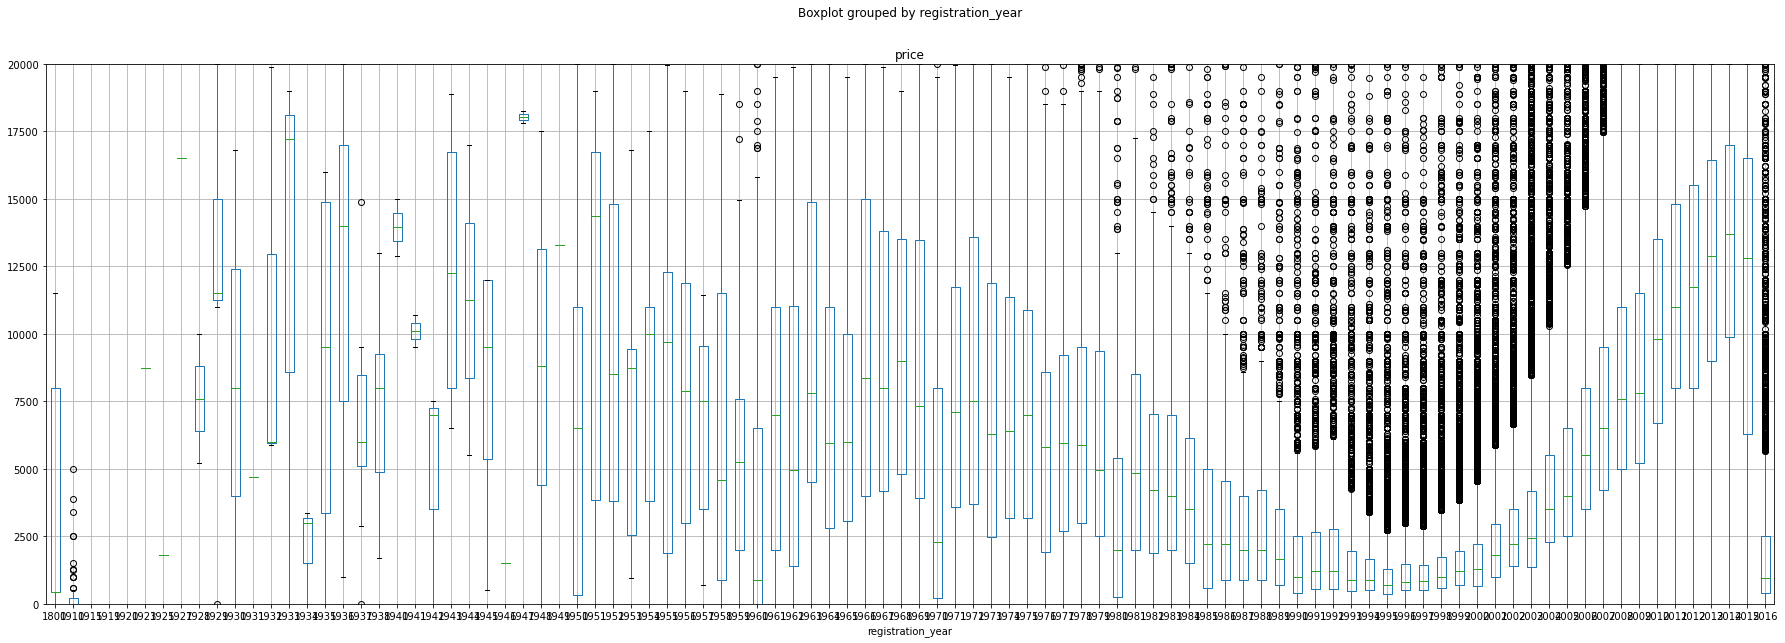

In [34]:
df.boxplot('price', by='registration_year', figsize=(30,10))
plt.ylim(0,20000);

In [35]:
df_epoch['year_epoch'] = ["утечка" if df_epoch['registration_year'][i] == 0 else 'до 1970' if 
                          df_epoch['registration_year'][i]<1970 else 'с 1970 до 2000' if 
                          df_epoch['registration_year'][i]<2000 else 'с 2000 по 2010' if 
                          df_epoch['registration_year'][i]<2010 else 'с 2010' for i in range(len(df['model']))]
df_epoch.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen,year_epoch
0,2016-03-24 11:52:17,480,Нет,1993,manual,0,golf,150000,0,petrol,volkswagen,Нет,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,с 1970 до 2000
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,Нет,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,с 2010
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,Нет,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,с 2000 по 2010
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,с 2000 по 2010
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,с 2000 по 2010


<AxesSubplot:>

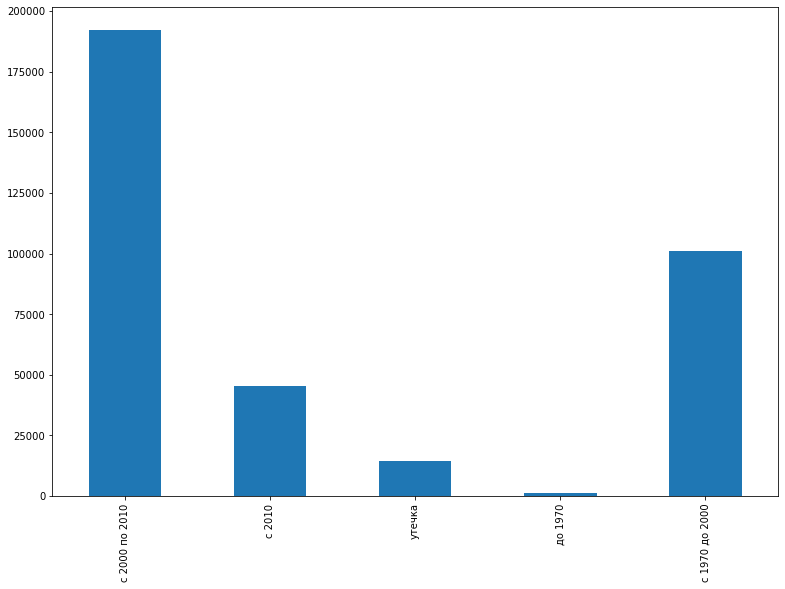

In [36]:
#Построение графика количества машин по годам
df_epoch['year_epoch'].value_counts(sort=False).plot.bar(figsize=(13,9))

Наиболее распространенный эпоха машины - с 2000 по 2010 год

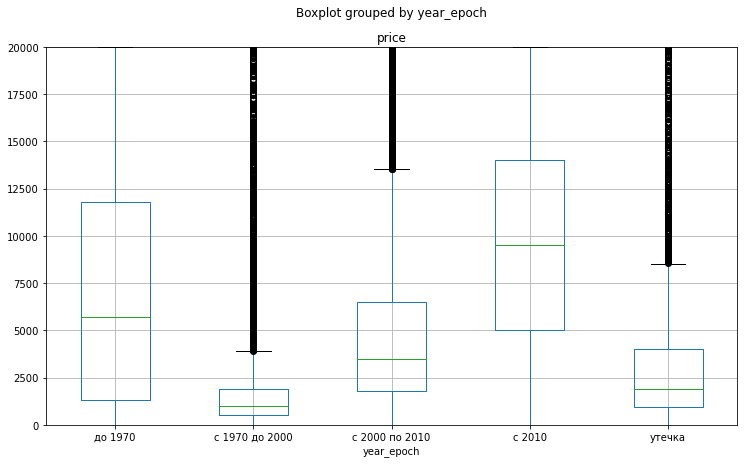

In [37]:
df_epoch.boxplot('price', by='year_epoch', figsize=(12,7))
plt.ylim(0,20000);

<AxesSubplot:>

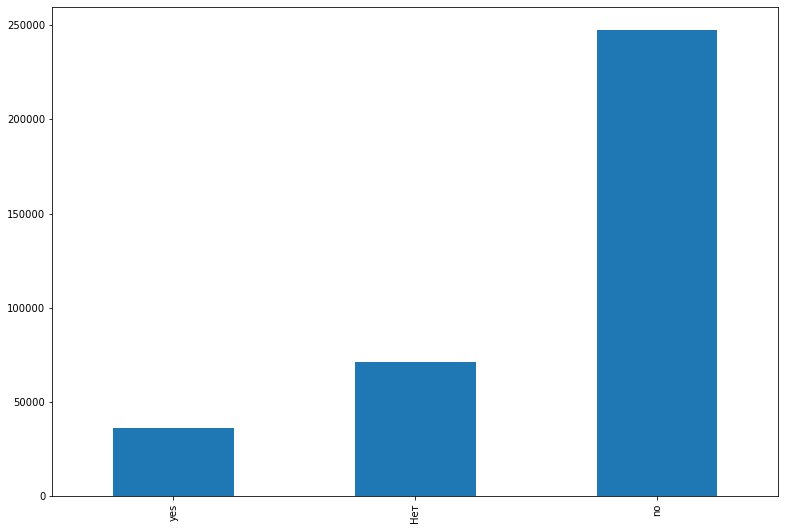

In [38]:
#Построение графика количества машин по наличию ремонта
df['repaired'].value_counts(sort=False).plot.bar(figsize=(13,9))

Наиболее распространено отсутствие ремонта

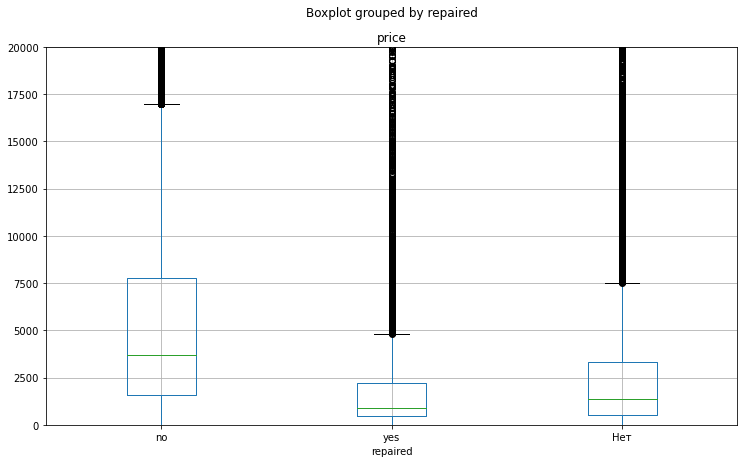

In [39]:
df.boxplot('price', by='repaired', figsize=(12,7))
plt.ylim(0,20000);

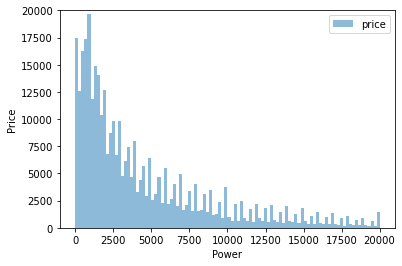

In [40]:
#гистограмма зависимости л.с. на цену
df.plot(y='price',x='power',kind='hist',
               bins= 100,
               alpha = 0.5,
               legend = True
              )
plt.ylabel('Price')
plt.xlabel('Power')
plt.ylim(0,20000);

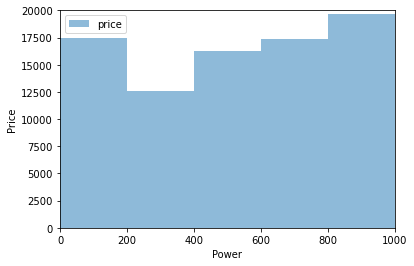

In [41]:
df.plot(y='price',x='power',kind='hist',
               bins= 100,
               alpha = 0.5,
               legend = True,
               xlim = (0,1000)
              )
plt.ylabel('Price')
plt.xlabel('Power')
plt.ylim(0,20000);

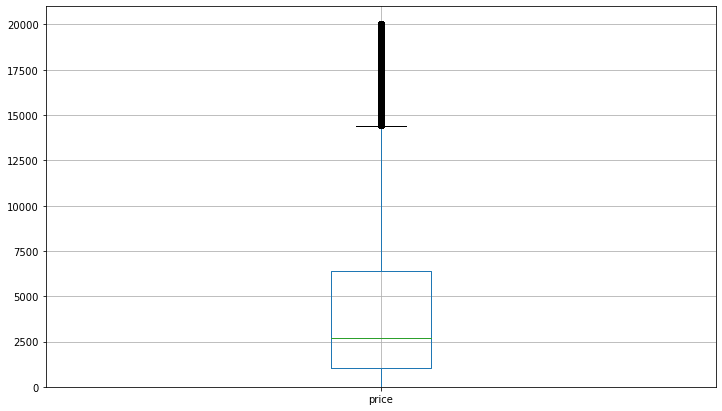

In [42]:
df.boxplot('price', figsize=(12,7))
plt.ylim(0,21000);

Наиболее распространены цены от 1000 до 6000

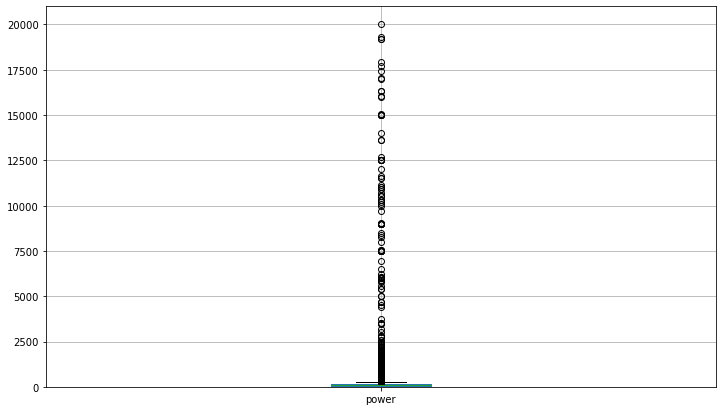

In [43]:
df.boxplot('power', figsize=(12,7))
plt.ylim(0,21000);

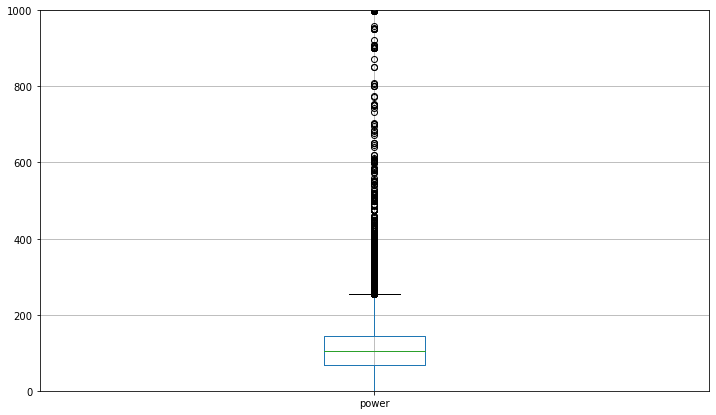

In [44]:
df.boxplot('power', figsize=(12,7))
plt.ylim(0,1000);

Отбросим выбросы:

In [45]:
len(df[df['price'] == 0])

10772

In [46]:
len(df[df['price'] < 10])

12028

In [47]:
df=df.query('power < 15000')

In [48]:
df = df.query('price < 17500')
df = df.query('price > 0')

In [49]:
df = df.query('power > 0').reset_index(drop=True)

In [50]:
df.head(20)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,Нет,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
1,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
3,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
4,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
5,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,Нет,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
6,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,Нет,volkswagen,Нет,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06
7,2016-03-26 19:54:18,2000,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
8,2016-04-07 10:06:22,2799,wagon,2005,manual,140,passat,150000,12,gasoline,volkswagen,yes,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
9,2016-03-15 22:49:09,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,Нет,2016-03-15 00:00:00,0,37269,2016-04-01 13:16:16


In [52]:
df.head(20)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,Нет,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
1,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
3,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
4,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
5,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,Нет,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
6,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,Нет,volkswagen,Нет,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06
7,2016-03-26 19:54:18,2000,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
8,2016-04-07 10:06:22,2799,wagon,2005,manual,140,passat,150000,12,gasoline,volkswagen,yes,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
9,2016-03-15 22:49:09,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,Нет,2016-03-15 00:00:00,0,37269,2016-04-01 13:16:16


In [53]:
len(df[df['price'] == 0])

0

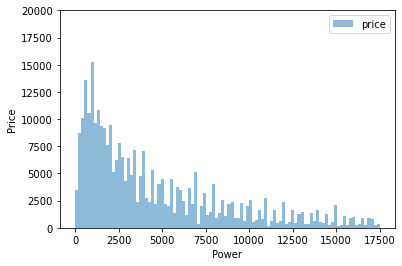

In [54]:
#гистограмма зависимости л.с. на цену
df.plot(y='price',x='power',kind='hist',
               bins= 100,
               alpha = 0.5,
               legend = True
              )
plt.ylabel('Price')
plt.xlabel('Power')
plt.ylim(0,20000);

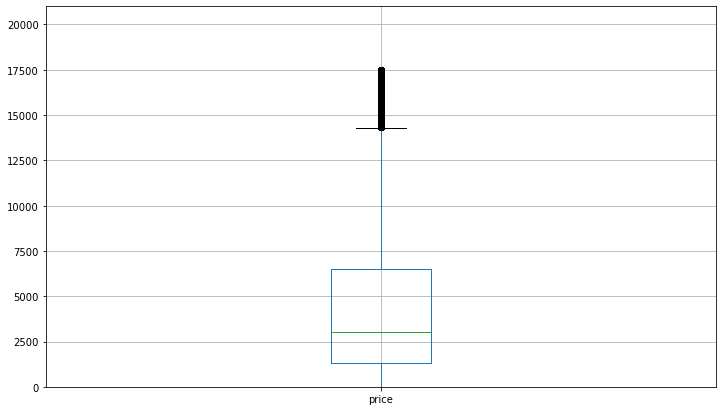

In [55]:
df.boxplot('price', figsize=(12,7))
plt.ylim(0,21000);

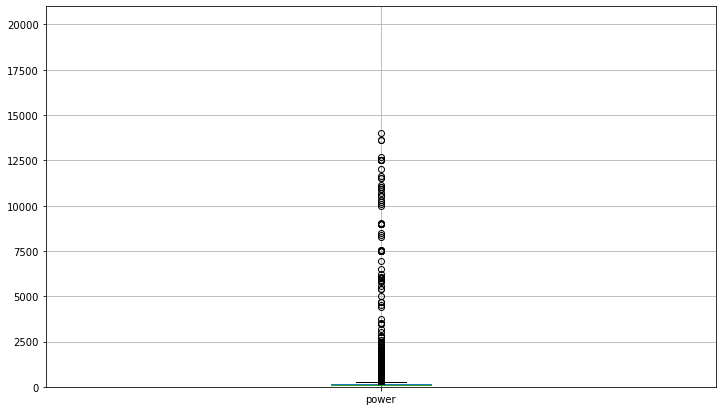

In [56]:
df.boxplot('power', figsize=(12,7))
plt.ylim(0,21000);

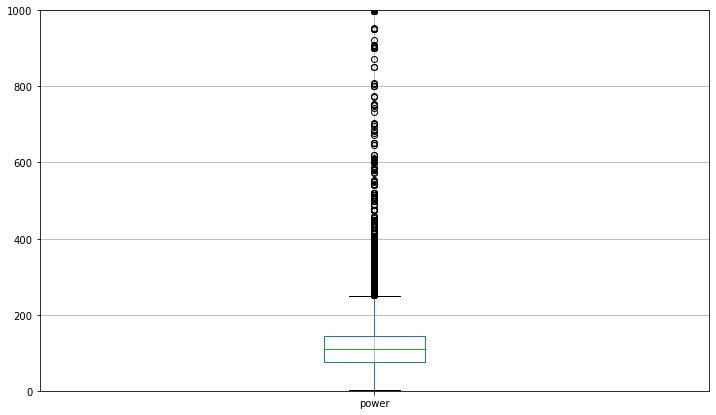

In [57]:
df.boxplot('power', figsize=(12,7))
plt.ylim(0,1000);

Наиболее распространено от 100 до 150 л.с.

#### Самая дорогая машина по графическому анализу

Для примера изобразим портрет самой дорогой машины. Отталкиваемся в большинстве случаев от "ящика с усами", т.к. он показывает зависимость определенного типа на цену машины. Выбираем тот тип, где интерквальный размах показывает наибольший промежуток цен:
* Тип кузова - 'sev'
* Тип коробки передач - 'auto'
* Модель - '3er'
* Год регистрации - 2022
* Ремонта не было
* Л.с. - 1000.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Здорово, что делашь такой подробный визуальный анализ! очень информативно.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно также заметить, что в переменной kilometer есть только определенные значения, то есть можно считать переменную категориальной.
        
Также в типе топлива FuelType можно увидеть gasoline и petrol - это один и тот же тип бензинового двигателя, но в разных странах называется по-разному.
        
Также можно оценить корреляцию между признаками.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
Кроме того стоит обработать аномальные значения в целевом признаке и в признаке Power.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> сверху добавил ящики с усами в этих колонках и дал пояснения, этого достаточно? Или нужно поставить ограничение на значения(отбросить выбросы) и посмотреть на новый график(ящика с усами)?
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Да, стоит отбросить выбросы. 
  
Потому что выбросы в цене, особенно нулевые, напрямую повлияют на ответ, который увидит новый пользователь для своей машины.

<div class="alert alert-block alert-info">
<b>Комментарий студента[2]:</b> 45 строка кода. Вроде исправил
</div>

#### Влияние отсутствия определенной информации о машине

На всех "ящиках с усами" можно заметить, что отсутствие информации понижает стоимость машины. Наша логика имеет место быть.

## Подготовка выборок

In [58]:
# извлекём признаки, удалим неинформативные признаки
delete = ['price','date_crawled','date_created','last_seen','postal_code','number_of_pictures']
features = df.drop(delete, axis=1)
# извлекём целевой признак
target = df['price']
# отделим 40% данных для валидационной и тестовой выборки в совокупности, остальные 60% - это обучающая выборка 
features_train, features_valid_test, target_train, target_valid_test = \
train_test_split(features,target,test_size=0.4,random_state=12345)
# отделим теперь  50% для тестовой выборки и 50 % для валидационной выборки из валидационной и тестовой выборки в совокупности
features_valid, features_test, target_valid, target_test =\
train_test_split(features_valid_test,target_valid_test,test_size=0.5,random_state=12345)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что удаляешь неинформативные для модели признаки.
    
Деление на выборки также корректное.

### Масштабирование признаков

In [59]:
numeric = ['registration_year','power','kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

<ipython-input-59-458dcf50fe2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-59-458dcf50fe2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [60]:
features_test[numeric] = scaler.transform(features_test[numeric])

<ipython-input-60-790ff2e27acd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично!

In [61]:
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
56219,small,0.989467,manual,-0.038297,astra,-0.123138,12,petrol,opel,no
243035,sedan,-1.044745,manual,0.019623,a4,0.573205,0,Нет,audi,yes
147711,small,-0.105878,manual,-0.154138,3_reihe,0.573205,1,petrol,mazda,no
78315,bus,-0.262356,manual,0.161207,zafira,0.573205,4,cng,opel,no
203699,wagon,-0.731790,manual,0.180514,5er,0.573205,12,petrol,bmw,yes


### Прямое кодирование

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь почему-то дублирование деления на выборки и получается, что не сохраняется масштабирование.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> убрал дублирование
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

## Обучение моделей

### CatBoostRegressor

In [62]:
%%time
cat_features = ['vehicle_type', 'gearbox', 'model', 
                'fuel_type', 'brand', 'repaired']
 
catboost = CatBoostRegressor(random_state=12345, cat_features=cat_features)
 
catboost.fit(features_train, target_train, verbose=False)

Wall time: 3min 49s


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
   
Молодец, что используешь внутренний кодер для CatBoost. И здорово, что измеряешь время обучения для fit и для predict  в отдельности.

In [63]:
%%time
predicted = catboost.predict(features_valid)
mse = mean_absolute_error(target_valid,predicted)
print(mse ** 0.5)
print(r2_score(target_valid, predicted).round(5))

31.2473678721699
0.86482
Wall time: 481 ms


In [64]:
#подбор гиперпараметров
for i in range(1,11):
    catboost = CatBoostRegressor(random_state=12345, cat_features=cat_features,max_depth=i)
 
    catboost.fit(features_train, target_train, verbose=False)
    predicted = catboost.predict(features_valid)
    mse = mean_absolute_error(target_valid,predicted)
    print('при глубине', i)
    print(mse ** 0.5)
    print(r2_score(target_valid, predicted).round(5))

при глубине 1
37.314459907544524
0.76872
при глубине 2
33.10164635248716
0.83359
при глубине 3
32.36163211474197
0.84723
при глубине 4
31.850812986650595
0.85574
при глубине 5
31.49055161247242
0.86143
при глубине 6
31.2473678721699
0.86482
при глубине 7
30.97895289579063
0.86904
при глубине 8
30.807063734626514
0.87154
при глубине 9
30.658892098965186
0.87349
при глубине 10
30.511764322018617
0.87513


### Дерево решений

In [65]:
features_test

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
261694,sedan,-0.888267,manual,-0.134832,passat,0.573205,4,petrol,volkswagen,yes
34709,wagon,-0.731790,manual,-0.102654,nubira,-0.123138,10,petrol,daewoo,no
151311,bus,-0.262356,manual,-0.134832,zafira,0.573205,1,petrol,opel,no
266232,small,-0.575312,manual,-0.398692,polo,0.573205,9,petrol,volkswagen,no
22460,convertible,0.832989,auto,0.264177,slk,-1.376556,1,petrol,mercedes_benz,no
...,...,...,...,...,...,...,...,...,...,...
166569,sedan,0.363555,manual,-0.302158,polo,0.573205,1,petrol,volkswagen,no
3753,small,-2.766002,manual,-0.533840,polo,-2.490705,7,petrol,volkswagen,no
131610,sedan,-0.731790,manual,-0.302158,golf,0.573205,5,petrol,volkswagen,no
76121,small,-0.575312,manual,-0.495226,twingo,0.573205,4,petrol,renault,no


In [66]:
#категориальные признаки
category = ['vehicle_type','gearbox','model','fuel_type','brand','repaired']
#порядковое кодирование
encoder = OrdinalEncoder(handle_unknown = 'игнорировать')
target_train_enc=target_train.copy()
target_valid_enc=target_valid.copy()
target_test_enc=target_test.copy()
features_train_enc=features_train.copy()
features_valid_enc=features_valid.copy()
features_test_enc=features_test.copy()
encoder.fit(features_train_enc[category])
features_train_enc[category] = encoder.transform(features_train_enc[category])
features_valid_enc[category] = encoder.transform(features_valid_enc[category])
features_test_enc[category] = encoder.transform(features_test_enc[category])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
Андрей, здесь обрати, пожалуйста, внимание, появляется ошибка. Ты сначала кодируешь, потом разделяешь на выборки.
    
Здорово, что ты используешь разные методы кодирования, но стоит и этот момент исправить.

По поводу разных способов кодирования:
    
    
В теории тренажера в данный момент предлагается использовать get_dummies, однако, это впоследствии приводит к сложностям в будущих спринтах, поэтому стоит использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. По аналогии с масштабированием просим делать fit только на трейне, а transform на всех выборках.
<hr>
get_dummies подходит для анализа данных, а для машинного обучения более предпочтителен OHE, т.к. он позоволяет избежать ряд ошибок при обучении моделей, в том числе может работать с неизвестными ранее уровнями категорий, которых не было изначально (например, если появится еще один бренд автомобиля).
    
То есть резюмируя:
    
1. делим на выборки
    
2. делаем fit_transform на терйне для OHEEncoder или Ordinal Encoder и transform для теста
    
если все же выберешь get_dummies, то все равно отдельно:
    
1. Сначала делим на выборки
    
2. трансформируешь трейн
    
3. трансформируешь тест

4. сравниваешь получились ли одинаковые признаки и там, и там
    
5. если нет, то добавляешь недостающие признаки в тест и валидацию и заполняешь нулями и убираешь лишние признаки из теста и валидации
    
Успехов!

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Не очень понимаю. Всегда же так делали, что в новой таблице кодировали, а потом по этой таблице разделяли на выборки. Порядковое кодирование специально использую для дерева решений. Скинул скрин ниже, по аналогии которого и делаю. Помоги, пожалуйста
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
  
Андрей, да, про тренажер знаем, возможно, скоро откорректируют подачу материла. Пока доносим, как надо, силами ревьюеров.
    
Выбор порядкового кодирования для моделей на основе деревьев решений не подвергаю сомнению, только порядок кодирования.
    
Смотри, когда мы кодируем до разделения на выборки, например, с помощью ordinal encoder, то происходит утечка данных из валидационной и тестовой (или только из тестовой, в зависимости от того, сколько выборок) в тренировочную часть. Кодер таким образом имеет представление о всех категориях и работает соответственно. То есть если придут новые данные от клиентов, которых не было в изначальных данных, например, новый бренд автомобиля и модель, то кодер не справится. Нам стоит уметь отрабатывать и это сценарий и без дообучения. В кодерах есть параметры отвечающие за этот сценарий.
    
Поэтому мы сначала делим на выборки. Потом уже все манипуляции.
    
Алгоритм работы с кодерами (Например, с OrdinalEncoder и OneHotEncoder) аналогичен StandardScaler, обучаем на трейне, трансформируем все выборки. Но только кодируем категорильные переменные, а масштабируем численные.
    
Ниже приведу пример кодирования с OneHotEncoder (аналогочно и с OrdinalEncoder), и с get_dummies:
    
##установим последнюю версию scikit-learn, если она не установлена
##теперь для OneHotEncoder работает одновремеено drop='first' и handle_unknown='ignore'
#!pip install scikit-learn==1.1.3
    
#эти фичи и таргет будем использовать для OneHotEncoder
    
features_train_ohe = features_train.copy()
    
features_test_ohe = features_test.copy()

#эти для get_dummies
    
features_train_gd = features_train_ohe.copy()
    
features_test_gd = features_test_ohe.copy()
    
#drop='first' удаляет первый признак из закодированных, чтобы избежать мультиколлинеарности
    
#handle_unknown='ignore' игнорирует ранее не встречающиеся признаки
    
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

#кодируем признаки в тренировочной выборке:
    
#энкодер обучается на тренировочной выборке и трансформируеи её, получаем датафрейм с закодированными категориальными 
признаками
    
#encoder_ohe.get_feature_names_out() позволяет получить названия колонок
    
features_cat_train = pd.DataFrame.sparse.from_spmatrix(
    
    encoder_ohe.fit_transform(features_train_ohe[cat_features]), 
    
    columns=encoder_ohe.get_feature_names_out()
)

#добавляем закодированные признаки в features_train_ohe, приведённые к цельночисленному типу (OneHotEncoder вернул float)
    
features_train_ohe[encoder_ohe.get_feature_names_out()] = features_cat_train.astype('int')

#удаляем категориальные признаки, которые остались незакодированными (изначальные колонки)
    
features_train_ohe = features_train_ohe.drop(cat_features, axis=1)

#создаём скелер
    
scaler = StandardScaler()

#обучаем его на численных признаках тренировочной выборки, трансформируем её же
    
features_train_ohe[num_features] = scaler.fit_transform(features_train_ohe[num_features])

#обрабатываем тестовую выборку
    
#энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
    
features_cat_test = pd.DataFrame.sparse.from_spmatrix(
    
    encoder_ohe.transform(features_test_ohe[cat_features]), 
    
    columns=encoder_ohe.get_feature_names_out()
)

features_test_oe[encoder_ohe.get_feature_names_out()] = features_cat_test.astype('int')

features_test_ohe = features_test_ohe.drop(cat_features, axis=1)

#скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
    
features_test_ohe[num_features] = scaler.transform(features_test_ohe[num_features])

Теперь посмотрим, как работает get_dummies:
    
#закодировали тренировочную с get_dummies
    
features_train_gd = pd.get_dummies(features_train_gd, drop_first='true')

#создаём скелер
    
scaler = StandardScaler()

#обучаем его на численных признаках тренировочной выборки, трансформируем её же
    
features_train_gd[num_features] = scaler.fit_transform(features_train_gd[num_features])

    
#закодировали тестовую с get_dummies
    
features_test_gd = pd.get_dummies(features_test_gd, drop_first='true')

#скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
    
features_test_gd[num_features] = scaler.transform(features_test_gd[num_features])

#смотрим, что получилось НЕ ОДИНАКОВОЕ количество признаков
    
features_train_gd.shape, features_test_gd.shape
    
#проверяем, есть ли признаки, которые имеются только в тренировочной выборке и отсутствуют в тестовой
    
columns_not_in_test = set(features_train_gd.columns) - set(features_test_gd.columns)
columns_not_in_test
    
#проверяем, есть ли признаки, которые имеются только в тренировочной выборке и отсутствуют в тестовой
    
columns_not_in_test = set(features_train_gd.columns) - set(features_test_gd.columns)
    
columns_not_in_test
    
#проверяем, есть ли признаки, которые имеются только в тестовой выборке и отсутствуют в тренировочной
    
columns_not_in_train = set(features_test_gd.columns) - set(features_train_gd.columns)
    
columns_not_in_train
    
Если получилось, что у нас есть признаки, которые есть только в тренировочной выборке, то нам необходимо добавить их в тестовую и заполнить значения 0. Если есть признаки, которые есть в тестовой, но отсутствуют в тренировочной, нужно было бы удалить их из тестовой.

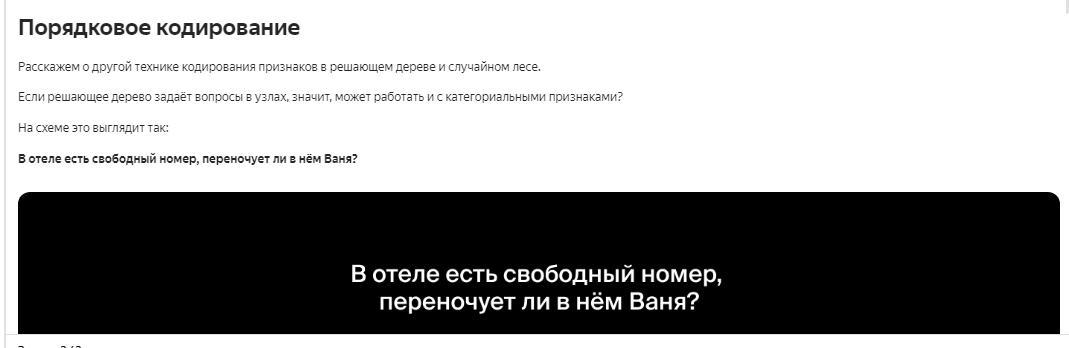
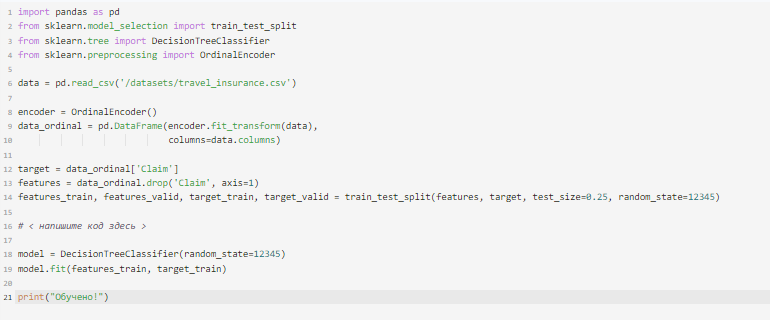

<div class="alert alert-block alert-info">
<b>Комментарий студента[2]:</b> сверху сделал, вроде уяснил. Спасибо за подробный комментарий!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
   
    
Здорово, что используешь порядковое кодирование для модели на основе деревьев решений.

In [67]:
%%time
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train_enc, target_train_enc) 

Wall time: 37.5 s


DecisionTreeClassifier(random_state=12345)

In [68]:
%%time
predicted = model.predict(features_valid_enc)
mse = mean_absolute_error(target_valid_enc,predicted)
print(mse ** 0.5)
print(r2_score(target_valid_enc, predicted).round(5))

35.2996032585647
0.74097
Wall time: 1.08 s


In [69]:
#подбор гиперпараметров
for i in range(10,50,9):
    model = DecisionTreeClassifier(random_state=12345,max_depth = i)
    model.fit(features_train_enc, target_train_enc)
    predicted = model.predict(features_valid_enc)
    mse = mean_absolute_error(target_valid_enc,predicted)
    print('при глубине', i)
    print(mse ** 0.5)
    print(r2_score(target_valid_enc, predicted).round(5))

при глубине 10
37.327692715637404
0.70378
при глубине 19
36.548454043347505
0.71273
при глубине 28
35.36615481806263
0.73884
при глубине 37
35.24127997621946
0.74309
при глубине 46
35.2996032585647
0.74097


### LightGBM

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Все импорты стоит перенести в начало проекта.
        
Также у LightGBM есть внутренний кодер, можно использовать его. Хотя порядковое кодирование тоже подходит.

In [71]:
%%time
model = LGBMRegressor(random_state=12345)
model.fit(features_train_enc,target_train_enc)

Wall time: 2.12 s


LGBMRegressor(random_state=12345)

In [72]:
%%time
predicted = model.predict(features_valid_enc)
mse = mean_absolute_error(target_valid_enc,predicted)
print(mse ** 0.5)
print(r2_score(target_valid_enc, predicted).round(5))

32.48627378523637
0.84664
Wall time: 216 ms


In [73]:
#подбор гиперпараметров
trees = [10, 50, 100, 500, 1000, 5000]
for i in trees:
    for j in range(11):
        model = LGBMRegressor(random_state=12345,n_estimators=i, max_depth=j)
        model.fit(features_train_enc,target_train_enc)
        predicted = model.predict(features_valid_enc)
        mse = mean_absolute_error(target_valid_enc,predicted)
        print('при глубине', j,'кол-ве деревьев',i)
        print(mse ** 0.5)
        print(r2_score(target_valid_enc, predicted).round(5))

при глубине 0 кол-ве деревьев 10
42.75728062312012
0.65067
при глубине 1 кол-ве деревьев 10
50.34432669963866
0.36099
при глубине 2 кол-ве деревьев 10
47.17925403542379
0.49528
при глубине 3 кол-ве деревьев 10
45.389081382357666
0.55912
при глубине 4 кол-ве деревьев 10
43.82521890588926
0.61515
при глубине 5 кол-ве деревьев 10
42.968522691139576
0.64418
при глубине 6 кол-ве деревьев 10
42.80008938120027
0.64967
при глубине 7 кол-ве деревьев 10
42.760153156827975
0.6505
при глубине 8 кол-ве деревьев 10
42.75728062312012
0.65067
при глубине 9 кол-ве деревьев 10
42.75728062312012
0.65067
при глубине 10 кол-ве деревьев 10
42.75728062312012
0.65067
при глубине 0 кол-ве деревьев 50
33.439699958137695
0.83096
при глубине 1 кол-ве деревьев 50
42.593003309538496
0.62436
при глубине 2 кол-ве деревьев 50
38.09331625078053
0.73951
при глубине 3 кол-ве деревьев 50
36.20577897940776
0.77827
при глубине 4 кол-ве деревьев 50
34.77865264437557
0.8052
при глубине 5 кол-ве деревьев 50
33.96070323306617
0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что перебираешь 2 параметра для LightGBM

### Линейная регрессия с помощью бустинга

In [74]:
class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        print(X)
        y = train_target
        w = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            batches_count = int(X.shape[0]/self.batch_size) # < напишите код здесь >
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i+1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                gradient = 2 * X_batch.T.dot(X_batch.dot(w) - y_batch) / X_batch.shape[0]# < напишите код здесь >
                
                w -= gradient * self.step_size# < напишите код здесь >
        self.w = w[1:]
        self.w0 = w[0]
        self.batches_count = batches_count
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [75]:
features_train.shape[0]

180220

In [76]:
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
56219,small,0.989467,manual,-0.038297,astra,-0.123138,12,petrol,opel,no
243035,sedan,-1.044745,manual,0.019623,a4,0.573205,0,Нет,audi,yes
147711,small,-0.105878,manual,-0.154138,3_reihe,0.573205,1,petrol,mazda,no
78315,bus,-0.262356,manual,0.161207,zafira,0.573205,4,cng,opel,no
203699,wagon,-0.731790,manual,0.180514,5er,0.573205,12,petrol,bmw,yes


In [77]:
target_train.shape

(180220,)

In [80]:
%%time
model = SGDLinearRegression(0.01, 1, 11000)
model.fit(features_train_enc, target_train_enc)

[[ 1.          5.          0.98946664 ...  6.         24.
   0.        ]
 [ 1.          4.         -1.04474529 ...  7.          1.
   1.        ]
 [ 1.          5.         -0.10587824 ...  6.         19.
   0.        ]
 ...
 [ 1.          2.         -1.20122313 ...  4.          2.
   0.        ]
 [ 1.          4.          0.0505996  ...  6.          2.
   0.        ]
 [ 1.          5.          0.8329888  ...  6.         27.
   0.        ]]
Wall time: 80 ms


In [81]:
%%time
pred_train = model.predict(features_valid_enc)
print(r2_score(target_valid_enc, pred_train).round(5))
mse = mean_absolute_error(target_valid_enc,pred_train)
print(mse ** 0.5)

-2.3632734808117534e+82
2.310976147703566e+22
Wall time: 16 ms


## Анализ моделей

### CatBoostRegressor

Без гиперпараметров
* Время обучения - 3,5 минуты
* Время предсказания - меньше секунды
* Эффективность модели - высокий показатель среди моделей
* Среднеквадратичная ошибка(целая часть) - 30.5

### Дерево решений

Без гиперпараметров
* Время обучения - 50 сек
* Время предсказания - 1,5 сек
* Эффективность модели - средний показатель среди моделей
* Среднеквадратичная ошибка(целая часть) - 35

### LightGBM

Без гиперпараметров
* Время обучения - 1 сек
* Время предсказания - меньше секунды
* Эффективность модели - высокий показатель среди моделей
* Среднеквадратичная ошибка(целая часть) - 30.2

### Линейная регрессия с помощью бустинга

* Время обучения - меньше секунды
* Время предсказания - меньше секунды
* Эффективность модели - очень низкий показатель среди моделей. Стремится к переобучению
* Среднеквадратичная ошибка(целая часть) - 4

### Вывод

Первостепенно отталкиваемся от эффективности модели и среднеквадратичной ошибки: по этим показателем лучше всех показывает LightGBM и CatBoostRegressor. У модели LightGBM быстрое обучение в сравнении с CatBoostRegressor и Деревом решений(не рассматриваем линейную регрессию с помощью бустинга, т.к. качество модели очень низкое).

Рассмотрим модель LightGBM с гиперпараметрами: лучший показатели показала модель при глубине 10 кол-ве деревьев 5000

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что сводишь воедино все результаты для наглядности.

## Финальный тест

In [82]:
%%time
model = LGBMRegressor(random_state=12345,n_estimators=5000, max_depth=10)
model.fit(features_train_enc,target_train_enc)

Wall time: 26.2 s


LGBMRegressor(max_depth=10, n_estimators=5000, random_state=12345)

In [83]:
%%time
predicted = model.predict(features_test_enc)
mse = mean_absolute_error(target_test_enc,predicted)
print(mse ** 0.5)
print(r2_score(target_test_enc, predicted).round(5))

30.042323982862886
0.88087
Wall time: 11.5 s


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Прекрасно, что тестируешь только лучшую модель! Редкий человек)

### Вывод

На тесте показатель среднеквадратичной ошибки низкий(разница - 15.5)

## Общий вывод

Разработан портрет самой дорогой машины на основе графического анализа:
* Тип кузова - 'sev'
* Тип коробки передач - 'auto'
* Модель - '3er'
* Год регистрации - 2022
* Ремонта не было
* Л.с. - 1000.

Модель LightGBM показывает высокую эффективность. Она более точно сможет предсказать стоимость машины.
При глубине 10 кол-ве деревьев 5000 модель покажет показатели:
* Время обучения - 26 сек
* Время предсказания - 11 сек
* Эффективность - 88/100%
* RMSE - 30

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть резюмирующий вывод.

### Вопросы

Не понял, построил ли я средствами LightGBM модель градиентного бустинга?

Почему LightGBM показало одновременно высокое качество и быстрое время обучения?

Нужно по-максимуму делать меньше метрику RMSE? Потому что кажется, что мог еще больше сделать глубину, и тогда метрика была меньше.
На соревнованиях именно в этом соревнуются участники?

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
1. Прости, пожалуйста, ты мог бы переформулировать вопрос, а то я сомневаюсь, что правильно поняла.
        
2. Я думаю, это связано с применением порядкового кодирования, которое урезает время обучения.
Встроенный кодер, вероятно, превзошел бы по качеству, но был бы дольше.
        
3. Конечно, если есть желание, можно крутить сколько угодно. Но в задаче достаточно, чтобы модель не превосходила 2500 по метрике, этого достаточно. 
        
На соревнованиях добиваются чаще всего точности, да. Но бывает, что также стоят требования к скорости моделей и к ресурсоемкости.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> содержится ли в модели LightGBM градиентный бустинг?
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь я оставлю несколько интересных и полезных ссылок по теме:
        
        
1. "XGBoost, LightGBM or CatBoost — which boosting algorithm should I use?"

https://medium.com/riskified-technology/xgboost-lightgbm-or-catboost-which-boosting-algorithm-should-i-use-e7fda7bb36bc
        
        
2. "Transforming categorical features to numerical features"
        
https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic
        
        
3. "Градиентный Бустинг: самый частый вопрос на собеседовании на дата саентиста"
        
https://www.youtube.com/watch?v=ZNJ3lKyI-EY
        
4. "Tutorial: CatBoost Overview"
        
https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook
        
5. "Gradient Boosting from scratch"
        
https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Андрей, благодарю тебя за работу! Проект отличный, продуманный, структурно выдержанный и аккуратный. Видно, что ты вдумчиво подходишь к работе. Однако стоит внести некоторые исправления, чтобы можно было считать проект завершенным.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть:**

1. Удалены все лишние признаки и константный признак
2. Есть промежуточные выводы по ходу анализа признаков
3. Есть обработка некорректных и пропущенных значений
4. Кодирование категориальных признаков осуществляется.
5. Есть анализ времени предсказания и обучения моделей, а также их качества
6. Предложена модель с учетом времени обучения и предсказания, а также качества работы
7. Аккуратность кода на высоком уровне.
8. Тестирование осуществляется только для лучшей модели
9. Для моделей использованы соответсвующие методы кодирования
10. Прекрасная визуализация
    
    
**Замечания, на которые стоит обратить внимание при будущей работе:**
    
    1. Пересмотреть верхнюю границу года регистрации.
    2. Обработать аномальные значения
    3. Кодировать до разбиения на выборки
    4. Избавиться от дублирующего кода
    
Остальные комментарии ты найдешь выше.

**Желаю удачи и жду твой проект на повторное ревью!** 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> в замечаниях 3 пункт: так кодировать до или после разбиения на выборки?)
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
Андрей, извини за это, пожалуйста. Это описка. Конечно же сначала разбиение на выборки, потом уже все манипуляции: и кодирование и масштабирование.

<div class="alert alert-block alert-info">
<b>Комментарий студента[2]:</b> ничего страшного! Вопрос: почему отбросив аномалия и сделав кодирование после деления на выборки значение RMSE работы модели LightGBM оказалось больше в два раза? Все ли правильно мы сделали?
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
Прекрасно, что ты сомневаешься, это хорошо, ничего не принимать на веру и вск проверять. Я бы порекомендовала тебе получить еще ответ от, например, преподавателя по проектам.
    
Метрика просто ближе к реальной жизни. То есть в реальной жизни модель, например, и кодер они не будут работать с тренировочными данными. Он получат какие-то новые, которые они ни разу не видели. Разумеется, модель покажет результат хуже на незнакомых данных.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> спасибо большое за рекомендации! Очень признателен
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №2</b>

Андрей, благодарю тебя за работу с рекомендациями! 
    
Осталось отбросить аномалии и осуществить кодирование после деления на выборки. Выше постаралась дать разъяснение.
    
**Жду твой проект на следующее ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №3</b>

    
Андрей, благодарю тебя за работу! 
    
Все прекрасно, 
    
**проект принимаю и желаю успехов в дальнешей учебе!**